In [41]:
import numpy as np
import warnings
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
from yahoo_fin import stock_info as si
import pandas as pd

from datetime import datetime
from dateutil.relativedelta import relativedelta

import tools
import importlib
importlib.reload(tools)

pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")
yf.pdr_override()

def plot_two_stocks(stock1, stock2, prevday_return, today_return):
    if '.prev' in stock1:
        stock1 = stock1.split('.prev')[0]
        print(stock1)
    #
    df1 = yf.download(stock1, start=start)
    df1['Date'] = df1.index
    df1['Date'] = df1['Date'].apply(mdates.date2num)
    df2 = yf.download(stock2, start=start)
    df2['Date'] = df2.index
    df2['Date'] = df2['Date'].apply(mdates.date2num)
    #
    ohlc_seq = ['Date', 'Open', 'High', 'Low', 'Close']
    fig = plt.figure(figsize = (15,20))
    # fig.suptitle('{}.HK {}'.format(label, start_date.year), fontsize=18)
    current_row = 0
    ax_height = 3
    ax0 = plt.subplot2grid((15,4), (current_row,0), rowspan=ax_height, colspan=4)
    ax0.grid(True)
    candlestick_ohlc(ax0, df1[ohlc_seq].values, width=.4, colorup='#53c156', colordown='#ff1717')
    ax0.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax0.legend(['Prev {}'.format(stock1)])
    #
    current_row = current_row + ax_height
    ax_height = 3
    ax1 = plt.subplot2grid((15,4), (current_row,0), rowspan=ax_height, colspan=4, sharex=ax0)
    ax1.grid(True)
    candlestick_ohlc(ax1, df2[ohlc_seq].values, width=.4, colorup='#53c156', colordown='#ff1717')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax1.legend(['Today {}'.format(stock2)])
    #
    prev_stock = '{}.prev'.format(stock1)
    now_stock = stock2
    compare_df = pd.concat([prevday_returns[prev_stock], today_returns[now_stock]], axis=1)
    print('Total prev stock rise {}'.format(compare_df[compare_df[prev_stock]<0].shape[0]))
    print('Total prev stock rise and today rise {}'.format(compare_df[(compare_df[prev_stock]<0) & (compare_df[now_stock]<0)].shape[0]))
    #
    current_row = current_row + ax_height
    ax_height = 3
    ax2 = plt.subplot2grid((15,4), (current_row,0), rowspan=ax_height, colspan=4, sharex=ax0)
    ax2.grid(True)
    ax2.plot(prevday_return.index,prevday_return.values,color="black",label="Prevday Return",linewidth=1)
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax2.legend(['Prev {}'.format(stock1)])
    #
    current_row = current_row + ax_height
    ax_height = 3
    ax3 = plt.subplot2grid((15,4), (current_row,0), rowspan=ax_height, colspan=4, sharex=ax0)
    ax3.grid(True)
    ax3.plot(today_return.index,today_return.values,color="blue",label="Today Return",linewidth=1)
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax3.legend(['Today {}'.format(stock2)])

In [2]:
num_of_years = 1
start = dt.date.today() - dt.timedelta(days = int(365.25*num_of_years))
end = dt.date.today()

In [3]:
# df = pd.read_csv('data/mktcap.csv', index_col=0)
# df = df[df['mktcap']>0]
#
# Use csv file from China
df = pd.read_csv('data/hk_stock_full.csv', header=None)
df = df.rename(columns={0: 'stock'})

In [4]:
df

,stock
0,0001.HK
1,0002.HK
2,0003.HK
3,0004.HK
4,0005.HK
5,0006.HK
6,0007.HK
7,0008.HK
8,0009.HK
9,0010.HK


In [5]:
def stock_begin_timegap(stock):
    num_of_years = 1
    start = dt.date.today() - dt.timedelta(days = int(365.25*num_of_years))
    try:
        df = yf.download(stock, start=start)
        stock_start = df.index[0]
        coeff_var = df['Close'].std() / df['Close'].mean()
        return np.array(((stock_start - pd.to_datetime(start)).days, coeff_var))
    except:
        return np.array((10000, 10000))

In [6]:
%%time
df['gap'], df['coeff_var'] = zip(*df['stock'].apply(stock_begin_timegap))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 2906.HK: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 2959.HK: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*************

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [7]:
df

,stock,gap,coeff_var
0,0001.HK,0.0,0.165602
1,0002.HK,0.0,0.052398
2,0003.HK,0.0,0.104661
3,0004.HK,0.0,0.148602
4,0005.HK,0.0,0.241038
5,0006.HK,0.0,0.131614
6,0007.HK,0.0,0.348281
7,0008.HK,0.0,0.043024
8,0009.HK,0.0,0.352504
9,0010.HK,0.0,0.082670


In [8]:
stock_df = df[(df['gap']<=5) & (df['coeff_var']<1000)]

In [9]:
stock_df.count()

stock        2175
gap          2175
coeff_var    2175
dtype: int64

In [10]:
stock_df.describe()

,gap,coeff_var
count,2175.0,2175.000000
mean,0.0,0.208751
std,0.0,0.152082
min,0.0,0.000000
25%,0.0,0.115854
50%,0.0,0.170152
75%,0.0,0.253232
max,0.0,1.353488


In [11]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2305
Data columns (total 3 columns):
stock        2175 non-null object
gap          2175 non-null float64
coeff_var    2175 non-null float64
dtypes: float64(2), object(1)
memory usage: 68.0+ KB


In [ ]:
stock_df = stock_df[stock_df['coeff_var']<=stock_df['coeff_var'].mean()]

In [12]:
stock_df.to_csv('data/stock_qualified.csv')

### Find correlation

In [13]:
stock_df = pd.read_csv('data/stock_qualified.csv', index_col=0)

In [14]:
%%time
tickers = stock_df['stock'].to_list()
dataset = pdr.get_data_yahoo(tickers, start, end)['Adj Close']

[*********************100%***********************]  2175 of 2175 completed
CPU times: user 3min 3s, sys: 18.9 s, total: 3min 22s
Wall time: 10min 40s


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2019-11-29 to 2020-11-27
Columns: 2175 entries, 0001.HK to 9988.HK
dtypes: float64(2175)
memory usage: 4.2 MB


In [16]:
dataset.to_csv('data/all_stock_close.csv')

In [17]:
dataset.head(3)

,0001.HK,0002.HK,0003.HK,0004.HK,0005.HK,0006.HK,0007.HK,0008.HK,0009.HK,0010.HK,...,8613.HK,8619.HK,8621.HK,8622.HK,8627.HK,8631.HK,8635.HK,8668.HK,9900.HK,9988.HK
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-29,67.347710,76.526260,13.820722,18.581327,57.880558,51.345554,0.83,4.408247,0.096,18.472321,...,0.070,2.65,0.233,0.149,0.61,0.16,0.121275,0.161,1.44,198.399994
2019-12-02,67.252991,76.316010,13.802240,18.306629,58.179428,51.345554,0.83,4.370889,0.097,18.374788,...,0.070,2.66,0.227,0.149,0.75,0.16,0.125187,0.159,1.43,195.500000
2019-12-03,66.779381,76.411591,13.783663,18.169281,57.731125,52.052792,0.83,4.408247,0.097,18.413799,...,0.067,2.59,0.225,0.149,0.86,0.16,0.115407,0.165,1.43,192.600006


### Use close on all stocks to compile result

In [18]:
dataset = pd.read_csv('data/all_stock_close.csv')
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', drop=True, inplace=True)

### analyze shift

In [ ]:
dataset['0001.HK'].head(5)

In [ ]:
dataset['0001.HK'].shift(1).head(5)

In [ ]:
dataset['0001.HK'].shift(2).head(5)

In [ ]:
print('Rise {}  Drop {}  NoChange {}'.format(np.log(0.9), np.log(1.1), np.log(1)))

### prevday and today

In [19]:
prevday_returns = np.log(dataset.shift(1)/dataset.shift(2))
today_returns = np.log(dataset/dataset.shift(1))

In [20]:
stocks_prev = prevday_returns.columns.to_list()
stocks_today = today_returns.columns.to_list()

In [21]:
new_col = ['{}.prev'.format(c) for c in stocks_prev]
prevday_returns.columns = new_col

In [22]:
comb_df = pd.concat([prevday_returns, today_returns], axis=1)

In [23]:
%%time
print('\nCorrelation Matrix')
corr_matrix = comb_df.corr()
# print(corr_matrix)


Correlation Matrix
CPU times: user 12.1 s, sys: 14.5 ms, total: 12.1 s
Wall time: 15.5 s


In [24]:
corr_matrix_corrected = corr_matrix.loc[new_col, stocks_today]

### What to drop

In [25]:
sorted_corr = corr_matrix_corrected.abs().unstack().sort_values(ascending=False)
sorted_corr.shape

(4730625,)

In [26]:
sorted_corr.head(10)

8612.HK  6898.HK.prev    0.801891
1315.HK  0056.HK.prev    0.769068
8208.HK  1500.HK.prev    0.768040
1636.HK  8631.HK.prev    0.764083
1121.HK  1195.HK.prev    0.761376
6898.HK  1216.HK.prev    0.752115
1439.HK  8627.HK.prev    0.740761
0276.HK  0608.HK.prev    0.715286
1500.HK  0712.HK.prev    0.709879
1216.HK  1371.HK.prev    0.690519
dtype: float64

### Analyze the top pair

In [27]:
for i, r in sorted_corr.head(10).items():
    prev = i[1]
    today = i[0]
    print('{} {} {:.2f}'.format(prev, today, comb_df[prev].corr(comb_df[today])))

6898.HK.prev 8612.HK -0.80
0056.HK.prev 1315.HK -0.77
1500.HK.prev 8208.HK -0.77
8631.HK.prev 1636.HK 0.76
1195.HK.prev 1121.HK 0.76
1216.HK.prev 6898.HK 0.75
8627.HK.prev 1439.HK 0.74
0608.HK.prev 0276.HK -0.72
0712.HK.prev 1500.HK 0.71
1371.HK.prev 1216.HK 0.69


0.7640828298305856
8631.HK
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Total prev stock rise 101
Total prev stock rise and today rise 49


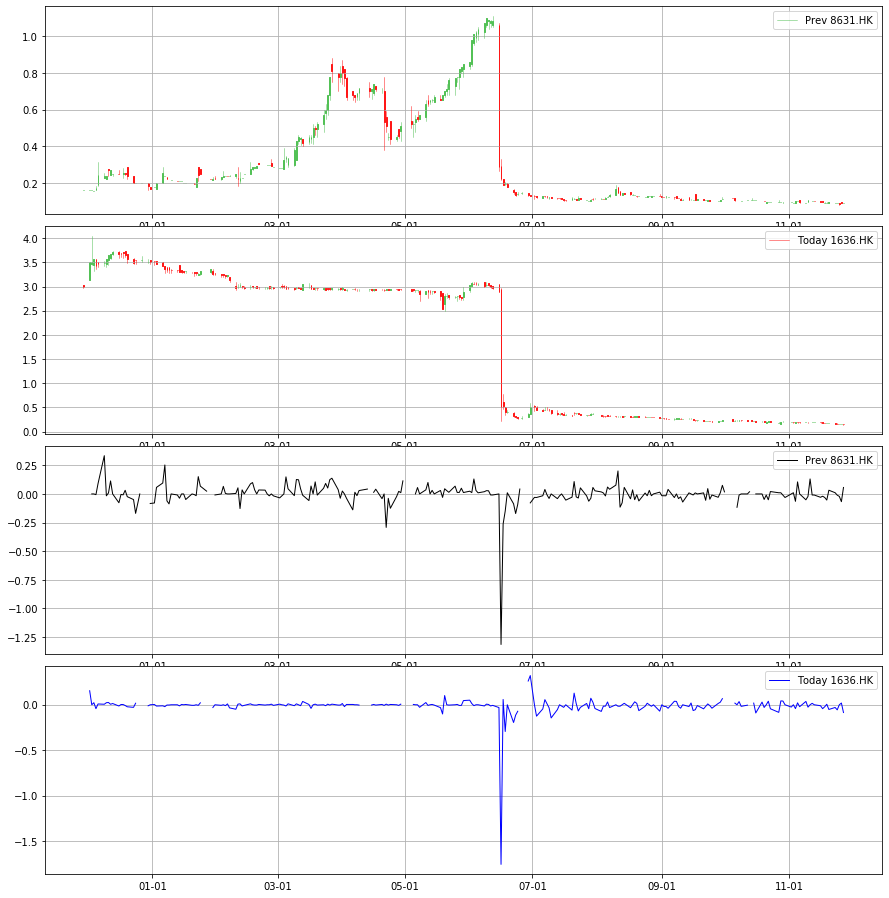

In [42]:
stock1 = '8631.HK.prev'
stock2 = '1636.HK'
#
print(comb_df[stock1].corr(comb_df[stock2]))
tools.plot_two_stocks(stock1, stock2, prevday_returns, today_returns, start)

### Grapth the top correlation pair

In [ ]:
stock1 = '6898.HK.prev'
stock2 = '8612.HK'
#
print(comb_df[stock1].corr(comb_df[stock2]))
plot_two_stocks(stock1, stock2, prevday_returns[stock1], today_returns[stock2])